<a href="https://colab.research.google.com/github/Erika-Dianney-Martinez/README/blob/main/Variables_aleatorias_discretas_Equipo_3_(ejercicios).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables aleatorias discretas

In [2]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings("ignore")


# Variable aleatoria uniforme discreta

Una variable aleatoria $X$ tiene distribución uniforme discreta en el conjunto $\{x_{1},\dots,x_{n}\}$ si su función de masa de probabilidades está dada por
$$f_{X}(k)=\mathbb{P}(X=k)=\begin{cases}
\frac{1}{n} &\quad \text{si } k\in\{x_{1},\dots,x_{n}\} \\
0 &\quad \text{en otro caso}
\end{cases}$$

**Notación:** $X\sim Unif(x_{1},\dots,x_{n}).$

Se llama uniforme porque cada uno de los posibles valores de $X$ tienen la misma probabilidad.

Si $X\sim Unif(x_{1},\dots,x_{n})$, en este caso, se tiene:
	$$\mathbb{E}[X] = \sum_{k}kf_{X}(k)=\frac{x_n + x_1}{2}.$$
	y
	$$\text{Var}(X) = \mathbb{E}[(X-\mathbb{E}[X])^{2}] =\sum_{k}(k-\mathbb{E}[X])^{2}f_{X}(k)=\frac{(x_n - x_1+1)^2-1}{12}$$

$\color{red}{\text{Ejercicio 1.}}$ Verifica que, en efecto, la esperanza y varianza de una variable aleatoria geométrica está dada como antes.
    


In [ ]:
# Función para calcular la esperanza de una distribución uniforme discreta
def esperanza_uniforme_discreta(x1, xn):
    return (x1 + xn) / 2

# Función para calcular la varianza de una distribución uniforme discreta
def varianza_uniforme_discreta(x1, xn):
    return ((xn - x1 + 1)**2 - 1) / 12

# Ejemplo de uso:
x1 = 1  # Primer valor del conjunto
xn = 6  # Último valor del conjunto

# Calcular esperanza y varianza
esperanza = esperanza_uniforme_discreta(x1, xn)
varianza = varianza_uniforme_discreta(x1, xn)

# Mostrar resultados
print(f'Esperanza de la distribución uniforme discreta: {esperanza}')
print(f'Varianza de la distribución uniforme discreta: {varianza}')


Esperanza de la distribución uniforme discreta: 3.5
Varianza de la distribución uniforme discreta: 2.9166666666666665


$\color{red}{\text{Ejercicio 2.}}$ Dibuja a la función de distribución acumulada de la variable aleatoria:
$$S:\{1,2,3,4,5,6\}^{2}\to \{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12 \}$$
dada por
$S(i,j)=i+j.$

In [ ]:
# Calcular la función de masa de probabilidad (FMP)
probabilidades = {
    2: 1/36,
    3: 2/36,
    4: 3/36,
    5: 4/36,
    6: 5/36,
    7: 6/36,
    8: 5/36,
    9: 4/36,
    10: 3/36,
    11: 2/36,
    12: 1/36
}

# Mostrar las probabilidades
for suma, prob in probabilidades.items():
    print(f"P(S = {suma}) = {prob}")


P(S = 2) = 0.027777777777777776
P(S = 3) = 0.05555555555555555
P(S = 4) = 0.08333333333333333
P(S = 5) = 0.1111111111111111
P(S = 6) = 0.1388888888888889
P(S = 7) = 0.16666666666666666
P(S = 8) = 0.1388888888888889
P(S = 9) = 0.1111111111111111
P(S = 10) = 0.08333333333333333
P(S = 11) = 0.05555555555555555
P(S = 12) = 0.027777777777777776


In [ ]:
# Calcular la función de distribución acumulada (FDA)
acumulada = 0
fda = {}

for suma in range(2, 13):
    acumulada += probabilidades[suma]
    fda[suma] = acumulada

# Mostrar la FDA
for suma, prob_acum in fda.items():
    print(f"F_S({suma}) = {prob_acum}")


F_S(2) = 0.027777777777777776
F_S(3) = 0.08333333333333333
F_S(4) = 0.16666666666666666
F_S(5) = 0.2777777777777778
F_S(6) = 0.4166666666666667
F_S(7) = 0.5833333333333334
F_S(8) = 0.7222222222222223
F_S(9) = 0.8333333333333335
F_S(10) = 0.9166666666666669
F_S(11) = 0.9722222222222224
F_S(12) = 1.0000000000000002


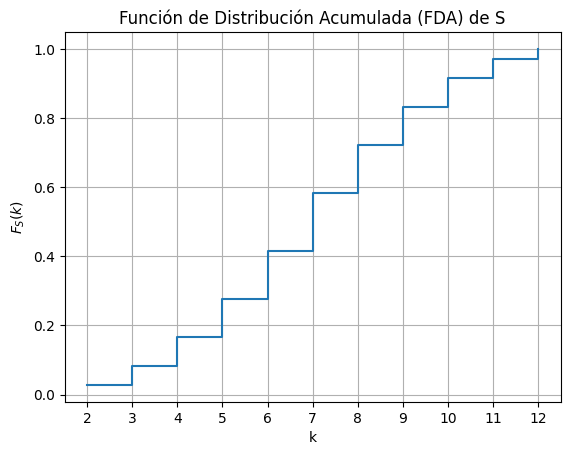

In [ ]:
import matplotlib.pyplot as plt

# Valores de S
k_values = list(fda.keys())

# Probabilidades acumuladas
F_S = list(fda.values())

# Graficar la FDA
plt.step(k_values, F_S, where='post')
plt.xlabel('k')
plt.ylabel('$F_S(k)$')
plt.title('Función de Distribución Acumulada (FDA) de S')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Variable aleatoria Poisson

**Ejemplo:** Supongamos que el número de accidentes que ocurre en un punto tiene una distribución Poisson con parámetro $\lambda=2$.
* ¿Cuál es la probabilidad de que en un día ocurran más de dos accidentes?
  $$\begin{align*}
	\mathbb{P}(X>2) &= 1-\mathbb{P}(X\le 2) \\ &=1-\left[\mathbb{P}(X=0)+\mathbb{P}(X=1)+\mathbb{P}(X=2)\right] \\ &= 1-\left[\frac{e^{-2}2^{0}}{0!}+\frac{e^{-2}2^{1}}{1!}+\frac{e^{-2}2^{2}}{2!}\right] \\ &= 1-e^{-2}\left[1+2+2\right] = 1-5e^{-2} = 0.3233
  \end{align*}$$

* ¿Cuál es la probabilidad de que en un día ocurran más de dos accidentes, sabiendo que ocurre por lo menos uno?
$$\begin{align*}
\mathbb{P}(X>2 \mid X\ge 1) = \frac{\mathbb{P}(X>2 \mid X\ge 1)}{\mathbb{P}(X\ge 1)} = \frac{\mathbb{P}(X>2)}{\mathbb{P}(X\ge 1)} = \frac{1-5e^{-2}}{1-e^{-2}} = \frac{0.3233}{0.8646} = 0.3739
\end{align*}$$
ya que $\mathbb{P}(X\ge 1)=1-\mathbb{P}(X<1)=1-\mathbb{P}(X=0)=1-e^{-2}$

$\color{red}{\text{Ejercicio 3.}}$ Usando el atributo `.cdf` [Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) calcula las probabilidades anteriores.


In [ ]:
## Ejercicio 3

#¿Cuál es la probabilidad de que en un día ocurran más de dos accidentes?

#Importamos la libreria spicy.stats e importamos la funcion Poisson, importamos igual matplotlib para graficar
import numpy as np
import scipy.stats as sps
from scipy.stats import poisson
import matplotlib.pyplot as plt

value_lambda = 2
#Calculamos la probabilidad Acumulada CDF de que sea menor o igual a 2, con λ = 2
probabilidad_acumulada = sps.poisson.cdf(2, value_lambda)

#Pero como buscamos aquellos que sean mayor a 2, por propiedad, podemos restar 1-p
probabilidad_acumulada = 1 - probabilidad_acumulada
print("La probabilidad de que ocurran más de 2 accidentes es : ",probabilidad_acumulada)

#¿Cuál es la probabilidad de que en un día ocurran más de dos accidentes, sabiendo que ocurre por lo menos uno?

#Primero calculamos la probabilidad de al menos un evento
probabilidad_menos_de_1 = 1 - sps.poisson.cdf(0, value_lambda)
probabilidad_mayor_de_2 = 1 - sps.poisson.cdf(2, value_lambda)

#Para calcular la probabilidad, por lo que hemos visto, tenemos que dividir
probabilidad_acumulada = probabilidad_mayor_de_2 / probabilidad_menos_de_1
print("La probabilidad de que en un día ocurran más de dos accidentes, sabiendo que ocurre por lo menos uno es : ",probabilidad_acumulada)

La probabilidad de que ocurran más de 2 accidentes es :  0.3233235838169366
La probabilidad de que en un día ocurran más de dos accidentes, sabiendo que ocurre por lo menos uno es :  0.37392942900133747


## Variable aleatoria Binomial Negativa con parámetros $r\geq 1$ y $p\in (0,1)$.

Supongamos que se realizan ensayos independientes, cada uno con probabilidad $0<p<1$ de ser un éxito, hasta obtener un total de $r$ éxitos acumulados. Sea $X$ el número de ensayos que se requieren, entonces su función de masa de probabilidades está dada por:
$$f_{X}(k)=\begin{cases}
	\binom{n-1}{r-1}p^{r}(1-p)^{n-r} &\quad \text{si } n=r,r+1,\dots \\
	\qquad 0 &\quad \text{en otro caso}  
\end{cases}$$



Notación. $X\sim \text{BN}(r,p)$.

Se tiene que
$$\mathbb{E}[X]=\frac{r}{p}$$
y
$$\text{Var}[X]=\frac{r(1-p)}{p^2}.$$

$\color{red}{\text{Ejercicio 4.}}$ Un examen de Estadística consta de 20 preguntas tipo test y se conoce de experiencias
anteriores que un alumno tiene probabilidad 0.7 de contestar bien cada pregunta. Obtener:

a) La probabilidad de que la primera pregunta que contesta bien sea la cuarta.

b) Sabiendo que para aprobar el examen es necesario contestar bien a 10 preguntas, ¿cuál es la probabilidad de que apruebe al contestar la pregunta duodécima?



***Solucion a):***

$X$ es la variable aleatoria binomial que cuenta el número de preguntas contestadas correctamente hasta que la primera correcta sea la cuarta. $X$ tiene una distribución $Geo(0.7)$.

Primero debemos calcular:

$\mathbb{P}(X=4)$ es la probabilidad de que exactamente las primeras tres preguntas sean incorrectas, entonces:

$$\begin{align*}
\mathbb{P}(X= 4)
&=(1-0.7)^{4-1}*(0.7)\\
&=(0.3)^{3}*(0.7)\\
&=0.0189  \\
\end{align*}$$

In [23]:
import scipy.stats as stats

p = 0.7
k = 4

p_1 = stats.geom.pmf(k, p)
print (round(p_1,4))

0.0189


**Solucion b):**

$Y$ es la variable aleatoria binomial negativa parámetros $n=12$, $p=0.7$ y $k=10$.

Vamos a calcular $\mathbb{P}(X = 12)$ probabilidad de que apruebe contestando correctamente la pregunta numero 12
$$\begin{align*}
\mathbb{P}(X = 12)
&= \binom{11}{9} (0.7)^{10} (0.3)^{2} \\
&= \frac{11!}{(11-9)!*9!} (0.7)^{10} (0.3)^{2} \\
&= 55* 0.02824* 0.09 \\
&= 0.139825 \\
\end{align*}$$



In [24]:
from scipy.stats import nbinom

k = 12
r = 10
p = 0.7
num_fracasos = k - r

p_2 = nbinom.pmf(num_fracasos, r, p)
print (round(p_2,4))

0.1398


$\color{red}{\text{Ejercicio 5.}}$ Investigue sobre el problema de la caja de cerillos de Banach y explique su solución.

El problema de coincidencia de Banach es un problema clásico de probabilidad atribuido a Stefan Banach.

Supongamos que un matemático lleva dos cajas de cerillas en todo momento: una en el bolsillo izquierdo y otra en el derecho. Cada vez que necesita una cerilla, es igualmente probable que la saque de cualquiera de los bolsillos. Supongamos que mete la mano en el bolsillo y descubre por primera vez que la caja elegida está vacía. Si se supone que cada una de las cajas de cerillas contenía originalmente $N$ cerillas, ¿Cuál es la probabilidad de que haya exactamente
$K$ cerillas en la otra caja?

### Solución

Si cada caja contiene $N$ cerillas, en el momento de encontrar una vacía la otra puede contener $0,1,2,...,N$ cerillas. Designemos por $Ar$ = {el bolsillo no vacío contiene $r$ cerillas}. Supongamos que la caja vacía es la del bolsillo izquierdo, para que ello ocurra $N − r$ fracasos (elecciones del bolsillo derecho) deben haber precedido al $N+1- ésimo$ éxito (elección del bolsillo derecho). En términos de una variable aleatoria $X ∼ BN(N + 1,1/2)$ se trata de obtener $P(X = N − r)$. El mismo argumento puede aplicarse si la caja vacía es la del bolsillo derecho. Así pues,


$$pr =P(Ar)=2P(X=N−r)= $$

$$2\binom{2N - r}{N - r}\frac{1}{2}^{N + 1}\frac{1}{2}^{N - r}=\binom{2N - r}{N - r}{2}^{-2N + r}$$



Por ejemplo, para $N=50$ y $r=4$, $pr =0.074790$; para $r=29$, $pr = 0.000232$.

$\color{red}{\text{Ejercicio 6.}}$ Una compañía petrolera realiza un estudio geológico que indica que un pozo petrolero exploratorio debería tener un 20% de posibilidades de encontrar petróleo.

- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?



- ¿Cuál es la probabilidad de que el primer pozo se produzca en el tercer pozo perforado?

Utilizando la distribución geometrica que modela el número de ensayos necesarios para obtener el primer éxito en un experimento de Bernoulli. Tenemos que

$$P(X=k)=q^{k−1}⋅p$$

Donde la probabilidad de éxito
$p = 0.2$ y $q = 1 - p = 1 - 0.2 = 0.8$ para el tercer intento  $k = 3$, entonces:

$$P(X=3)=0.80^{3−1}(0.20)=0.80^{2}(0.20)$$
$$P(X=3)=0.64(0.20)= 0.128$$

La probabilidad es $p = 0.128 $

In [ ]:
import scipy.stats as stats

p = 0.20
k = 3

p_1 = stats.geom.pmf(k, p)
print (round(p_1,4))

0.128


- ¿Cuál es la probabilidad de que el tercer pozo se produzca en el séptimo pozo perforado?

La probabilidad de que el tercer pozo con petróleo se produzca en el séptimo pozo perforado se puede calcular utilizando la fórmula de la distribución binomial negativa:

$$P(X=k)= \binom{k-1}{r-1} p^r (1-p)^{k-r} $$

donde:

$k=7$

$r=3$

$p=0.2$

$1−p=0.8$

Por lo tanto:

$$P(X=7)= \binom{6}{2} 0.2^3 (0.8)^{4} = 15 (0.008)(0.4096) = 0.049152 $$

In [ ]:
from scipy.stats import nbinom

k = 7
r = 3
p = 0.2
num_fracasos = k - r

p_2 = nbinom.pmf(num_fracasos, r, p)
print (round(p_2,4))

0.0492


- ¿Cuál es la media y la varianza del número de pozos que se deben perforar si la compañía petrolera quiere establecer tres pozos productores?

Para una distribución binomial negativa, se tiene que

$$\mathbb{E}[X]=\frac{r}{p}$$
y
$$\text{Var}[X]=\frac{r(1-p)}{p^2}.$$

Entonces:

$r=3$

$p=0.2$

$$\mathbb{E}[X]=\frac{r}{p} = \frac{3}{0.2} = 15$$

$$\text{Var}[X]=\frac{r(1-p)}{p^2} = \frac{3(0.8)}{0.2^2} = \frac{2.4}{0.04} = 60$$